In [1]:
import os
import yaml
import pandas as pd

# ✅ Base path where your monthly folders are
base_path = r"C:\Users\asus\Desktop\stock_analysis1"

# ✅ Output folder to store 50 CSV files
output_folder = os.path.join(base_path, "output")
os.makedirs(output_folder, exist_ok=True)

# ✅ Dictionary to store data grouped by ticker
ticker_data = {}

# ✅ Loop through all monthly folders inside base_path
for month_folder in os.listdir(base_path):
    month_path = os.path.join(base_path, month_folder)
    
    # Skip if not a folder or if it's output/env folders
    if not os.path.isdir(month_path) or month_folder in ['output', 'env', 'venv']:
        continue
    
    # ✅ Loop through all YAML files inside each month folder
    for file_name in os.listdir(month_path):
        if file_name.endswith(".yaml"):
            file_path = os.path.join(month_path, file_name)
            
            # ✅ Read YAML file
            with open(file_path, "r") as file:
                data = yaml.safe_load(file)
                
                # ✅ Each file may contain multiple entries
                if isinstance(data, list):
                    for record in data:
                        ticker = record.get('Ticker')
                        if ticker:
                            if ticker not in ticker_data:
                                ticker_data[ticker] = []
                            ticker_data[ticker].append(record)

# ✅ Convert each ticker's data into a separate CSV
for ticker, records in ticker_data.items():
    df = pd.DataFrame(records)
    csv_path = os.path.join(output_folder, f"{ticker}.csv")
    df.to_csv(csv_path, index=False)

print(f"✅ Conversion complete! {len(ticker_data)} CSV files created in {output_folder}")

✅ Conversion complete! 50 CSV files created in C:\Users\asus\Desktop\stock_analysis1\output


In [2]:
import os
import pandas as pd

# Folder where 50 CSVs are stored
output_folder = r"C:\Users\asus\Desktop\stock_analysis1\output"

# ✅ List first 5 CSV files
files = os.listdir(output_folder)
print("First 5 files:", files[:5])
print(f"Total files: {len(files)}")

# ✅ Check sample data from first file
if files:
    sample_file = os.path.join(output_folder, files[0])
    df = pd.read_csv(sample_file)
    print(f"\nSample from {files[0]}:")
    print(df.head())


#Clean Each CSV (Sort by Date, Ensure Data Types)
for file_name in os.listdir(output_folder):
    if file_name.endswith(".csv"):
        file_path = os.path.join(output_folder, file_name)
        
        
        
df = pd.read_csv(file_path)
        
        # ✅ Convert date to datetime and sort
if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'], errors='coerce')
            df = df.sort_values(by='date')
        
        # ✅ Ensure numeric columns
for col in ['open', 'high', 'low', 'close', 'volume']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # ✅ Save cleaned file
df.to_csv(file_path, index=False)

print("✅ All CSV files cleaned and sorted by date!")



First 5 files: ['ADANIENT.csv', 'ADANIPORTS.csv', 'APOLLOHOSP.csv', 'ASIANPAINT.csv', 'AXISBANK.csv']
Total files: 52

Sample from ADANIENT.csv:
     Ticker    close                 date     high      low    month     open  \
0  ADANIENT  2387.25  2023-10-03 05:30:00  2424.90  2372.00  2023-10  2418.00   
1  ADANIENT  2464.95  2023-10-04 05:30:00  2502.75  2392.25  2023-10  2402.20   
2  ADANIENT  2466.35  2023-10-05 05:30:00  2486.50  2446.40  2023-10  2477.95   
3  ADANIENT  2478.10  2023-10-06 05:30:00  2514.95  2466.05  2023-10  2466.35   
4  ADANIENT  2442.60  2023-10-09 05:30:00  2459.70  2411.30  2023-10  2440.00   

    volume  
0  2019899  
1  2857377  
2  1132455  
3  1510035  
4  1408224  
✅ All CSV files cleaned and sorted by date!


In [ ]:
#green vs red stock
import os
import pandas as pd

# ✅ Path to folder with all CSVs
output_folder = r"C:\Users\asus\Desktop\stock_analysis1\output"

# ✅ Store summary data for all stocks
summary = []

# ✅ Process each CSV
for ticker in os.listdir(output_folder):
    if ticker.endswith(".csv"):
        file_path = os.path.join(output_folder, ticker)
        df = pd.read_csv(file_path)

        # ✅ Check required columns
        required_cols = {'date', 'close', 'volume'}
        if not required_cols.issubset(df.columns):
            print(f"⚠️ Skipping {ticker} - missing columns: {required_cols - set(df.columns)}")
            continue

        if df.empty or len(df) < 2:
            print(f"⚠️ Skipping {ticker} - not enough data (rows: {len(df)})")
            continue

        try:
            df['date'] = pd.to_datetime(df['date'])
            df = df.sort_values('date')
        except Exception as e:
            print(f"⚠️ Skipping {ticker} - date conversion failed: {e}")
            continue

        # ✅ Calculate yearly return, last price, and last volume
        first_close = df['close'].iloc[0]
        last_close = df['close'].iloc[-1]
        yearly_return = ((last_close - first_close) / first_close) * 100
        last_volume = df['volume'].iloc[-1]

        summary.append([
            ticker.replace('.csv', ''),
            yearly_return,
            last_close,
            last_volume
        ])

# ✅ Create a summary DataFrame
summary_df = pd.DataFrame(summary, columns=[
    'Ticker', 'Yearly Return (%)', 'Last Price', 'Last Volume'
])

# ✅ Top 10 Green Stocks
top_10_green = summary_df.sort_values(by='Yearly Return (%)', ascending=False).head(10)
print("\n✅ Top 10 Green Stocks:\n", top_10_green)

# ✅ Top 10 Loss Stocks
top_10_loss = summary_df.sort_values(by='Yearly Return (%)', ascending=True).head(10)
print("\n✅ Top 10 Loss Stocks:\n", top_10_loss)

# ✅ Market Summary
green_count = summary_df[summary_df['Yearly Return (%)'] > 0].shape[0]
red_count = summary_df[summary_df['Yearly Return (%)'] < 0].shape[0]
avg_price = summary_df['Last Price'].mean()
avg_volume = summary_df['Last Volume'].mean()

print(f"\n✅ Market Summary:")
print(f"Green Stocks: {green_count}")
print(f"Red Stocks: {red_count}")
print(f"Average Price: ₹{avg_price:.2f}")
print(f"Average Volume: {avg_volume:,.0f}")


⚠️ Skipping volatility_summary.csv - missing columns: {'date', 'close', 'volume'}

✅ Top 10 Green Stocks:
         Ticker  Yearly Return (%)  Last Price  Last Volume
47       TRENT         223.092613     6652.80       833104
8          BEL         101.760057      280.85     13268900
30         M&M          95.976974     3012.95      4827125
5   BAJAJ-AUTO          89.011153     9481.65       619823
9   BHARTIARTL          69.599049     1569.30      7640321
35   POWERGRID          68.854924      336.95     31523269
10        BPCL          67.477150      285.85      6539977
20  HEROMOTOCO          58.976655     4794.10       394712
40   SUNPHARMA          57.282404     1795.30      1420813
17     HCLTECH          53.257447     1898.40      2765950

✅ Top 10 Loss Stocks:
         Ticker  Yearly Return (%)  Last Price  Last Volume
24  INDUSINDBK         -30.458409      998.20      4026863
3   ASIANPAINT         -21.935046     2472.20      3805854
7   BAJFINANCE         -16.110874     6683.

In [ ]:
#just check for date column

for file in os.listdir(output_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(output_folder, file)
        df = pd.read_csv(file_path)

        print(f"Processing {file} with columns: {df.columns.tolist()}")  # Debug line

        if 'date' not in df.columns:
            print(f"Skipping {file} - no 'date' column found.")
            continue  # skip files without 'date'

        # now safely convert and sort
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date')

        # rest of your code...


Processing ADANIENT.csv with columns: ['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume']
Processing ADANIPORTS.csv with columns: ['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume']
Processing APOLLOHOSP.csv with columns: ['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume']
Processing ASIANPAINT.csv with columns: ['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume']
Processing AXISBANK.csv with columns: ['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume']
Processing BAJAJ-AUTO.csv with columns: ['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume']
Processing BAJAJFINSV.csv with columns: ['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume']
Processing BAJFINANCE.csv with columns: ['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume']
Processing BEL.csv with columns: ['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume']
Processing BHARTIARTL

⚠️ Skipping volatility_summary.csv - missing 'date' or 'close'

✅ Volatility Summary Saved.


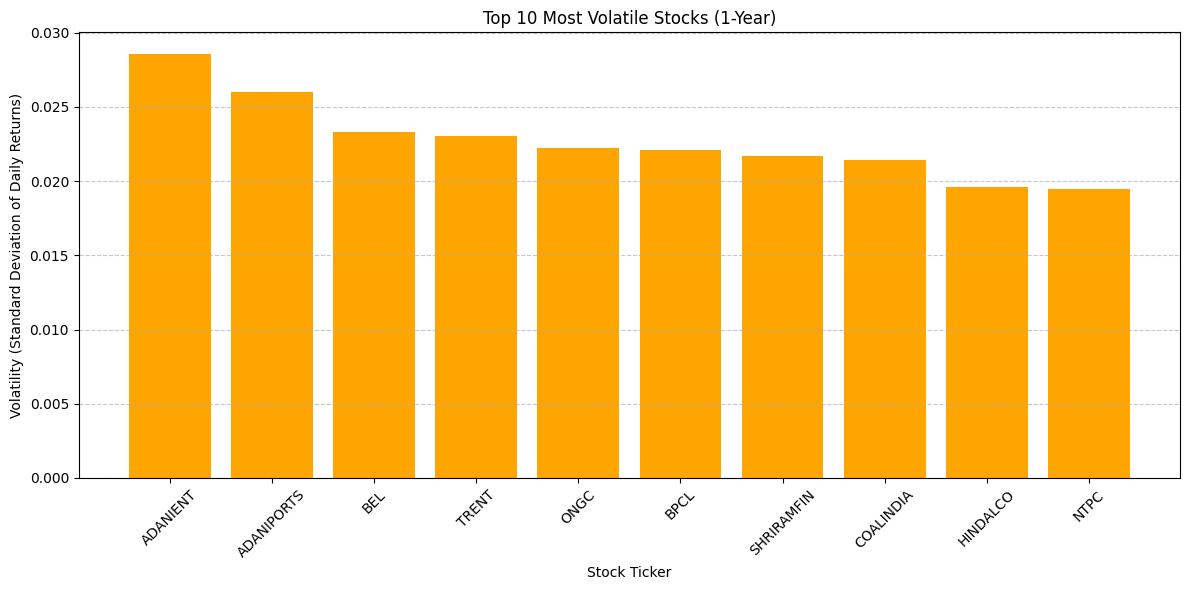

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

output_folder = r"C:\Users\asus\Desktop\stock_analysis1\output"
volatility_data = []

# Loop through each stock CSV
for file in os.listdir(output_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(output_folder, file)
        df = pd.read_csv(file_path)

        # ✅ Check required columns
        if 'date' not in df.columns or 'close' not in df.columns:
            print(f"⚠️ Skipping {file} - missing 'date' or 'close'")
            continue

        # ✅ Convert date and sort
        try:
            df['date'] = pd.to_datetime(df['date'])
            df = df.sort_values('date')
        except Exception as e:
            print(f"⚠️ Skipping {file} - date error: {e}")
            continue

        if len(df) < 2:
            print(f"⚠️ Skipping {file} - not enough data")
            continue

        # ✅ Calculate daily returns
        df['daily_return'] = df['close'].pct_change()

        # ✅ Calculate standard deviation (volatility)
        volatility = df['daily_return'].std()

        # ✅ Store results
        volatility_data.append({
            'Stock Ticker': file.replace('.csv', ''),
            'Volatility (Std Dev of Daily Returns)': volatility
        })

# ✅ Create DataFrame and save summary
vol_df = pd.DataFrame(volatility_data)
vol_df = vol_df.sort_values(by='Volatility (Std Dev of Daily Returns)', ascending=False)
vol_df.to_csv(os.path.join(output_folder, 'volatility_summary.csv'), index=False)

print("\n✅ Volatility Summary Saved.")

# ✅ Plot Top 10 Most Volatile Stocks
top_10_vol = vol_df.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_vol['Stock Ticker'], top_10_vol['Volatility (Std Dev of Daily Returns)'], color='orange')
plt.title('Top 10 Most Volatile Stocks (1-Year)')
plt.xlabel('Stock Ticker')
plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


⚠️ Skipping cumulative_return_summary.csv - missing 'date' or 'close'
⚠️ Skipping cumulative_return_timeseries.csv - missing 'date' or 'close'
⚠️ Skipping gainloss_csv.csv - missing 'date' or 'close'
⚠️ Skipping sector_performance.csv - missing 'date' or 'close'
⚠️ Skipping stock_prices.csv - missing 'date' or 'close'
⚠️ Skipping stock_price_correlation.csv - missing 'date' or 'close'


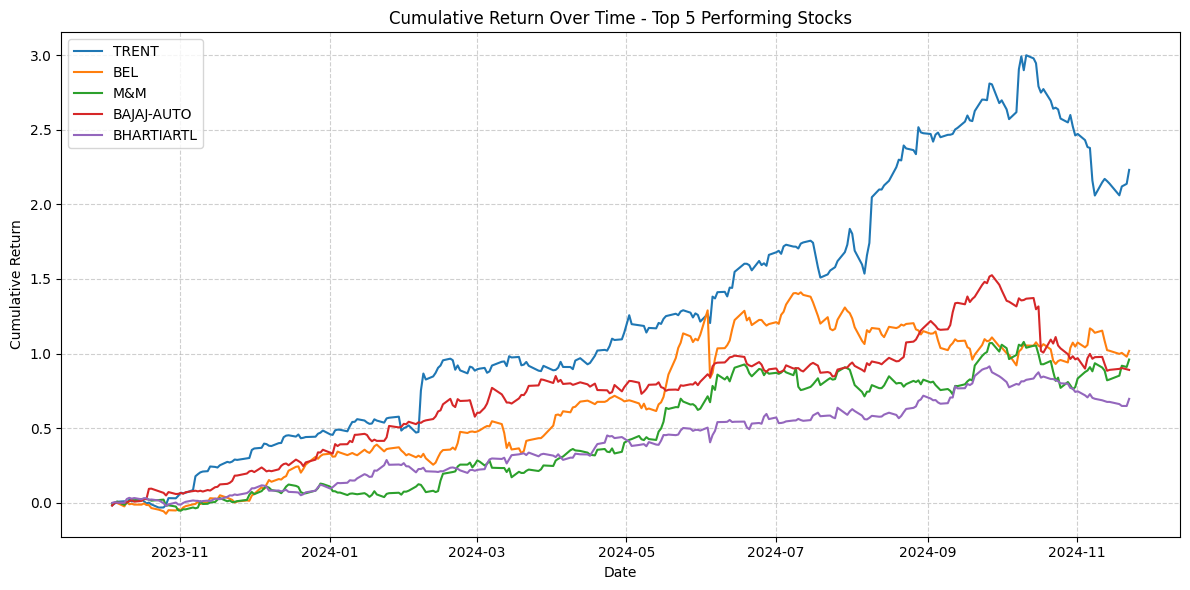

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to your stock CSV files
data_path = r"C:\Users\asus\Desktop\stock_analysis1\output"

# Store cumulative return DataFrames
cumulative_returns = {}
final_returns = []

# Loop through all stock files
for file in os.listdir(data_path):
    if file.endswith(".csv") and file != "volatility_summary.csv":
        filepath = os.path.join(data_path, file)
        df = pd.read_csv(filepath)

        # Ensure date and close columns exist
        if 'date' not in df.columns or 'close' not in df.columns:
            print(f"⚠️ Skipping {file} - missing 'date' or 'close'")
            continue

        # Convert date and sort
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date')

        # Calculate daily return
        df['daily_return'] = df['close'].pct_change()

        # Calculate cumulative return
        df['cumulative_return'] = (1 + df['daily_return']).cumprod() - 1

        # Save final cumulative return
        final_cum_return = df['cumulative_return'].iloc[-1]
        final_returns.append((file.replace('.csv', ''), final_cum_return))

        # Store for plotting
        cumulative_returns[file.replace('.csv', '')] = df[['date', 'cumulative_return']]

# Create summary DataFrame
summary_df = pd.DataFrame(final_returns, columns=['Ticker', 'Final Cumulative Return'])
summary_df = summary_df.sort_values(by='Final Cumulative Return', ascending=False)
summary_df.to_csv(os.path.join(data_path, 'cumulative_return_summary.csv'), index=False)
# Combine all cumulative return DataFrames into one for Power BI
combined_df = pd.DataFrame()

for ticker, df in cumulative_returns.items():
    df = df.copy()
    df['Ticker'] = ticker
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Export to CSV for Power BI
combined_df.to_csv(os.path.join(data_path, 'cumulative_return_timeseries.csv'), index=False)


# ✅ Plot top 5 stocks by cumulative return
top_5_tickers = summary_df.head(5)['Ticker'].tolist()

plt.figure(figsize=(12, 6))
for ticker in top_5_tickers:
    df = cumulative_returns[ticker]
    plt.plot(df['date'], df['cumulative_return'], label=ticker)

plt.title("Cumulative Return Over Time - Top 5 Performing Stocks")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_6580\1048362210.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\asus\Desktop\stock_analysis1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


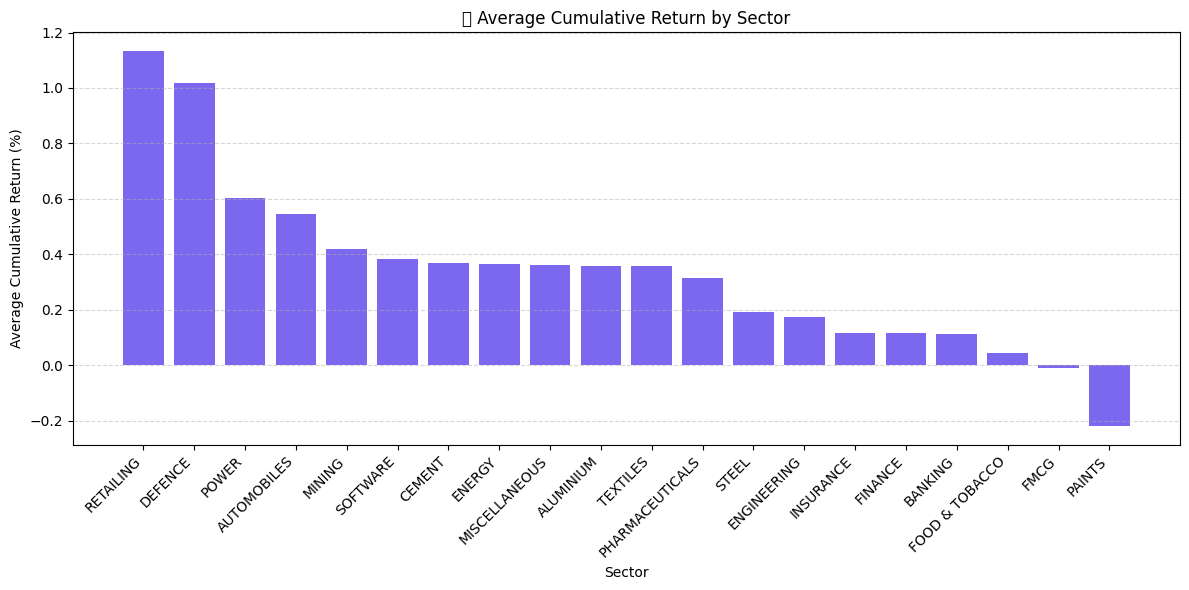

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load returns data (already calculated earlier in your pipeline)
returns_df = pd.read_csv(r"C:\Users\asus\Desktop\stock_analysis1\output\cumulative_return_summary.csv")

# ✅ Load the correct sector data
sector_path = r"C:\Users\asus\Desktop\stock_analysis1\sector_data.csv"
sectors_df = pd.read_csv(sector_path)

# ✅ Extract the actual ticker from the 'Symbol' column
sectors_df['Ticker'] = sectors_df['Symbol'].str.split(':').str[-1].str.strip()

# ✅ Clean column names (remove trailing spaces, just in case)
sectors_df.columns = sectors_df.columns.str.strip()
returns_df.columns = returns_df.columns.str.strip()

# ✅ Merge based on Ticker
merged_df = pd.merge(returns_df, sectors_df[['Ticker', 'sector']], on='Ticker', how='inner')

# ✅ Group by sector and calculate average cumulative return
sector_perf = merged_df.groupby('sector')['Final Cumulative Return'].mean().reset_index()
sector_perf = sector_perf.sort_values(by='Final Cumulative Return', ascending=False)

# ✅ Save as new CSV
sector_perf.to_csv(r"C:\Users\asus\Desktop\stock_analysis1\output\sector_performance.csv", index=False)

# ✅ Plot
plt.figure(figsize=(12, 6))
plt.bar(sector_perf['sector'], sector_perf['Final Cumulative Return'], color='mediumslateblue')
plt.title("📊 Average Cumulative Return by Sector")
plt.xlabel("Sector")
plt.ylabel("Average Cumulative Return (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Skipping cumulative_return_summary.csv (missing 'date' or 'close' column)
Skipping gainloss_csv.csv (missing 'date' or 'close' column)
Skipping sector_performance.csv (missing 'date' or 'close' column)
Skipping stock_price_correlation.csv (missing 'date' or 'close' column)
Skipping volatility_summary.csv (missing 'date' or 'close' column)
✅ Stock prices saved to C:\Users\asus\Desktop\stock_analysis1\output\stock_prices.csv
✅ Correlation matrix saved to C:\Users\asus\Desktop\stock_analysis1\output\stock_price_correlation.csv


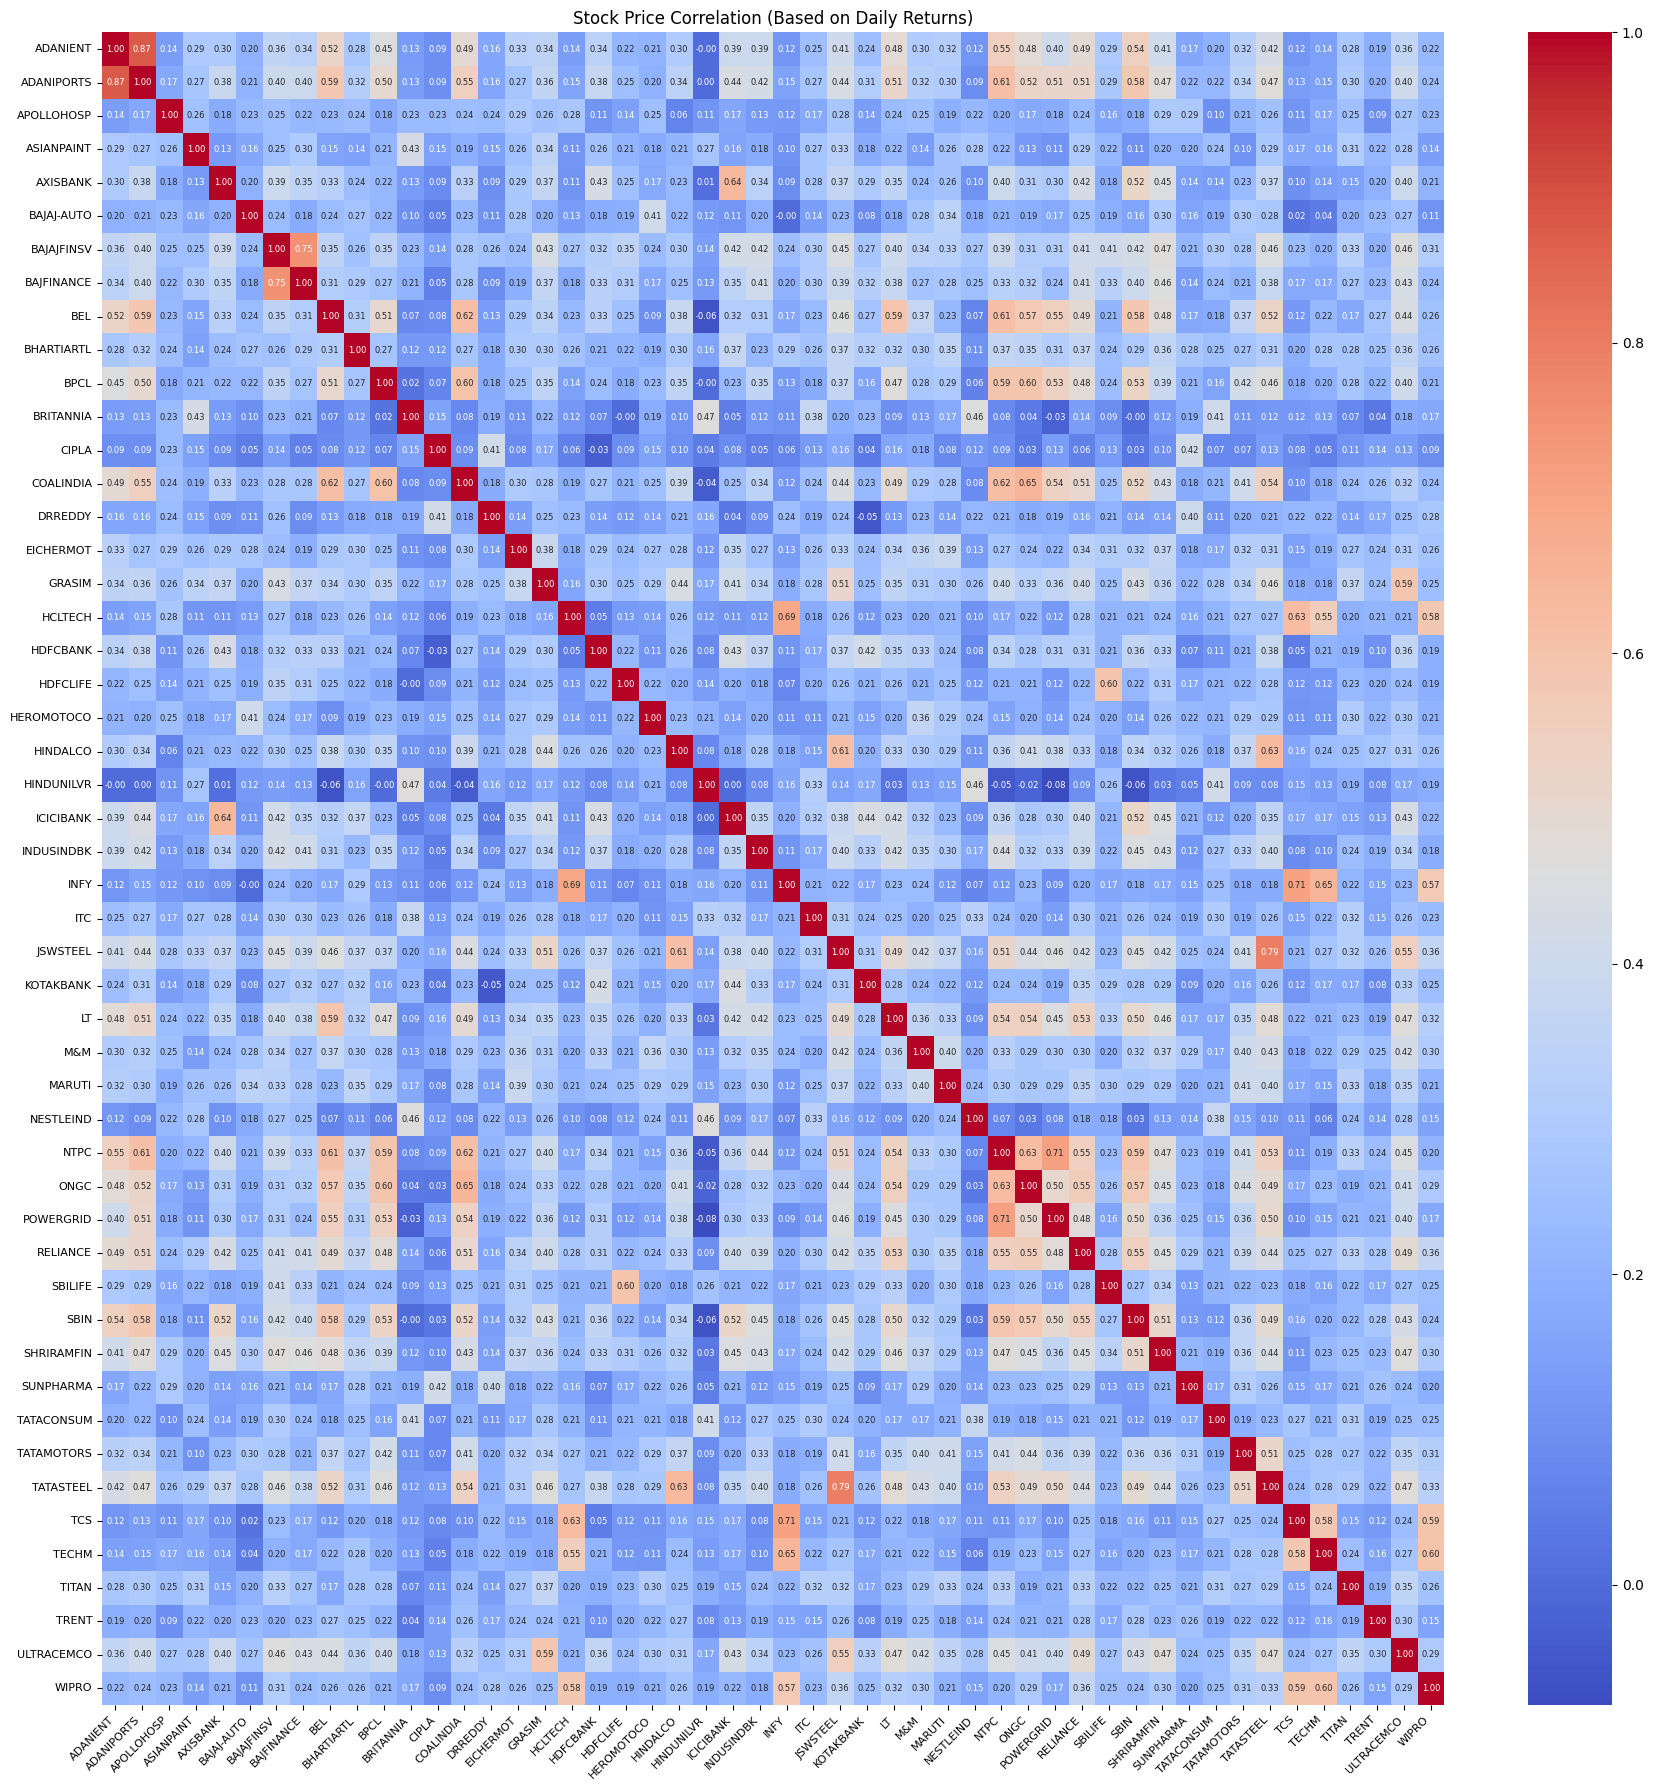

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Folder where individual stock CSV files are stored
output_folder = r"C:\Users\asus\Desktop\stock_analysis1\output"

# Initialize an empty DataFrame
price_df = pd.DataFrame()

# Loop through each CSV and combine
for file in os.listdir(output_folder):
    if file.endswith(".csv") and file != "stock_prices.csv":  # avoid overwriting
        file_path = os.path.join(output_folder, file)
        df = pd.read_csv(file_path)

        # ✅ Ensure the CSV has 'date' and 'close' columns
        if 'date' not in df.columns or 'close' not in df.columns:
            print(f"Skipping {file} (missing 'date' or 'close' column)")
            continue

        # Convert date to datetime
        df['date'] = pd.to_datetime(df['date'])

        # Sort by date
        df = df.sort_values('date')

        # Extract ticker name from filename
        ticker = file.replace('.csv', '')

        # Set date as index and take close prices
        price_series = df.set_index('date')['close'].rename(ticker)

        # Merge into master DataFrame
        if price_df.empty:
            price_df = price_series.to_frame()
        else:
            price_df = price_df.join(price_series, how='outer')

# ✅ Fill missing dates with forward fill to align trading calendars
full_date_range = pd.date_range(start=price_df.index.min(), end=price_df.index.max(), freq='D')
price_df = price_df.reindex(full_date_range).ffill()

# ✅ Save the cleaned and filled stock prices
combined_csv_path = os.path.join(output_folder, "stock_prices.csv")
price_df.to_csv(combined_csv_path)
print(f"✅ Stock prices saved to {combined_csv_path}")

# ✅ Compute daily percentage returns
returns_df = price_df.pct_change().dropna()

# ✅ Compute correlation matrix
corr_matrix = returns_df.corr()

# ✅ Save correlation matrix
corr_csv_path = os.path.join(output_folder, "stock_price_correlation.csv")
corr_matrix.to_csv(corr_csv_path)
print(f"✅ Correlation matrix saved to {corr_csv_path}")

# ✅ Plot heatmap
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, annot_kws={"size":6})
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.title("Stock Price Correlation (Based on Daily Returns)")
plt.tight_layout()
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_14432\3790680750.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = price_df.resample('M').last().pct_change() * 100  # percentage change


✅ Gain/Loss data saved to C:\Users\asus\Desktop\stock_analysis1\output\gainloss_csv.csv


C:\Users\asus\AppData\Local\Temp\ipykernel_14432\3790680750.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_data['Stock'], rotation=45, ha='right')
C:\Users\asus\AppData\Local\Temp\ipykernel_14432\3790680750.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_data['Stock'], rotation=45, ha='right')
C:\Users\asus\AppData\Local\Temp\ipykernel_14432\3790680750.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_data['Stock'], rotation=45, ha='right')
C:\Users\asus\AppData\Local\Temp\ipykernel_14432\3790680750.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabel

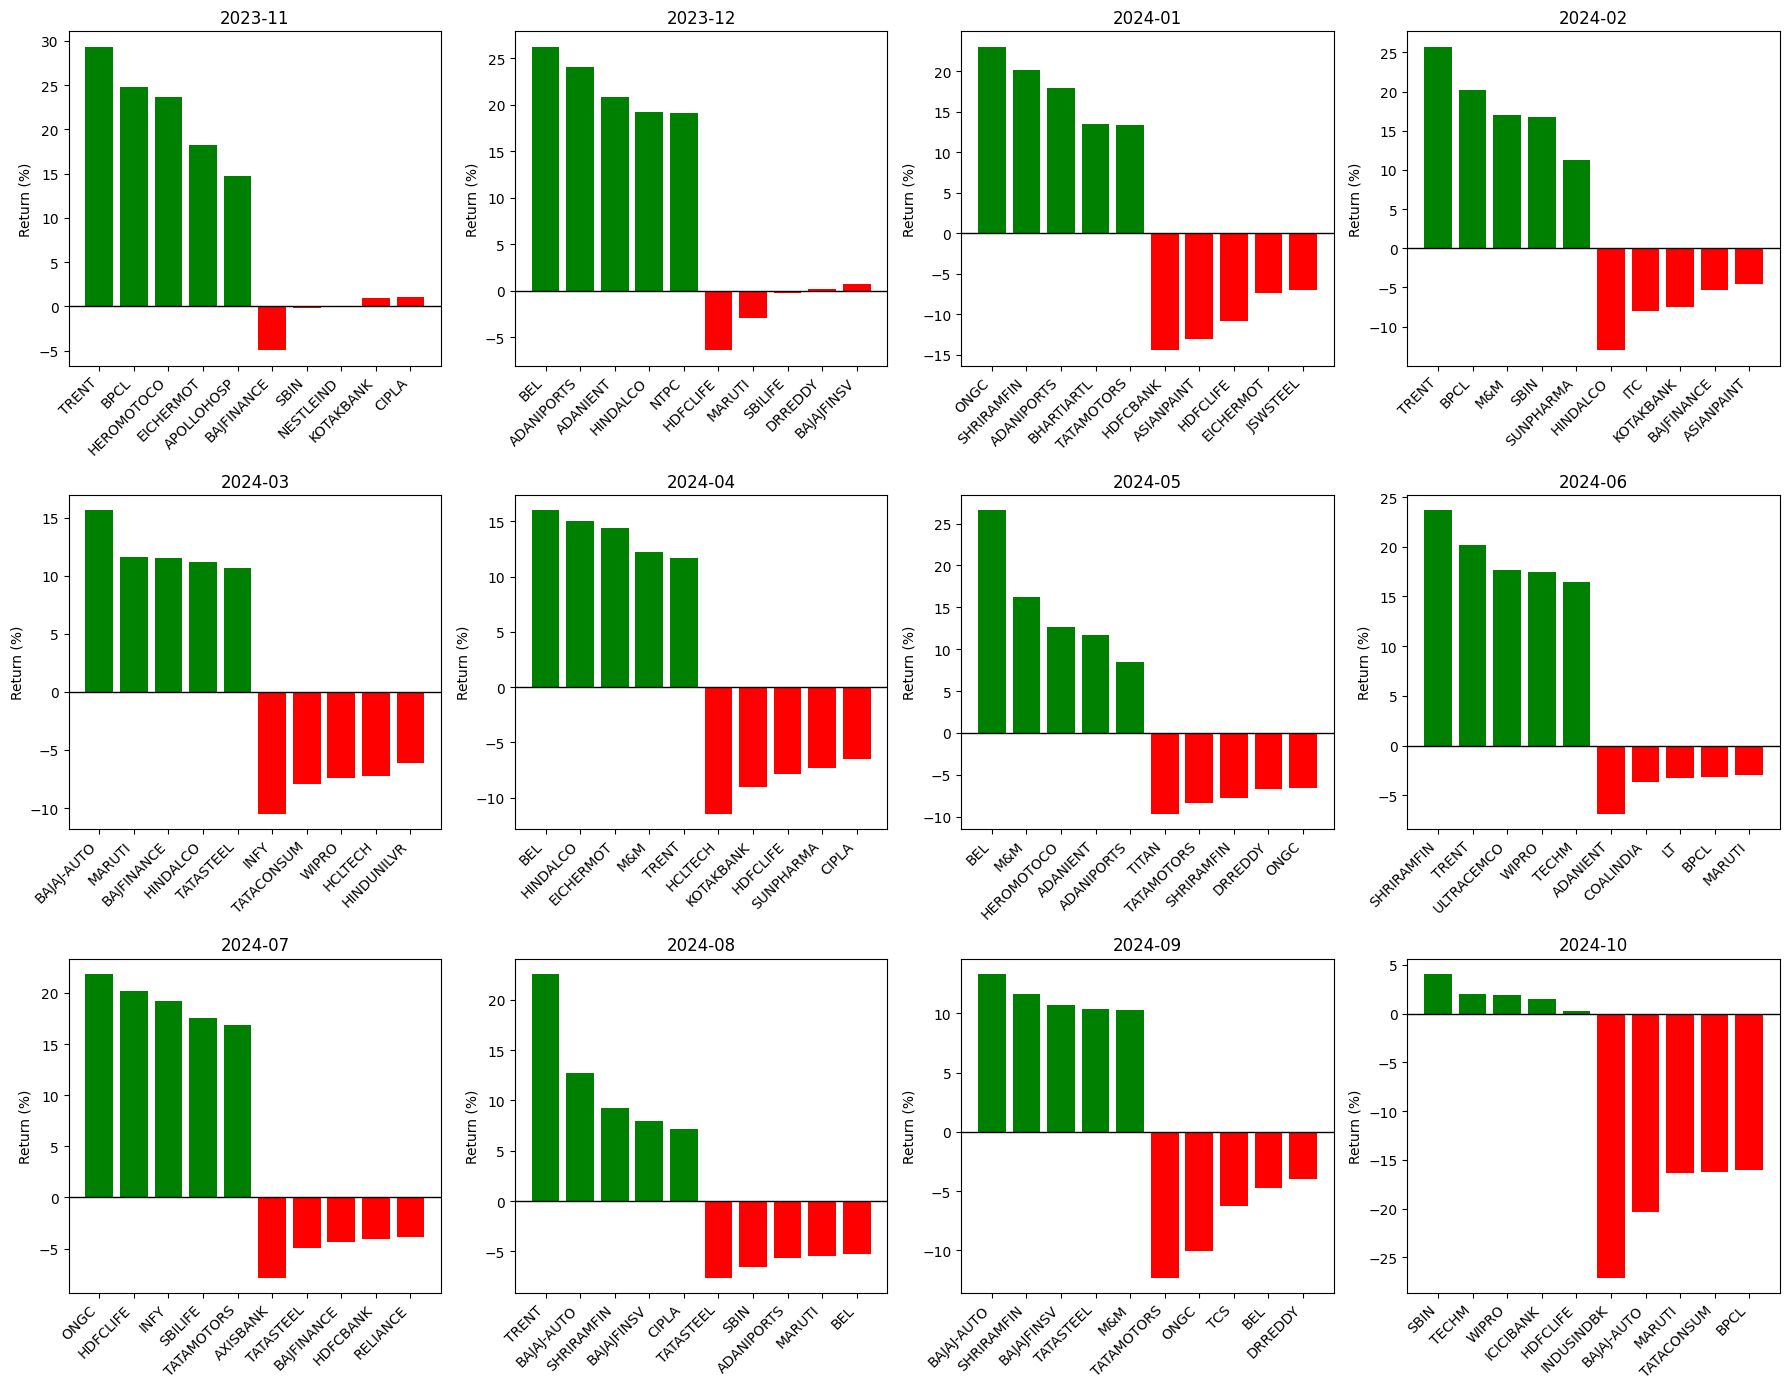

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder where the stock_prices.csv is stored
output_folder = r"C:\Users\asus\Desktop\stock_analysis1\output"

# ✅ Read the previously generated stock_prices.csv
file_path = os.path.join(output_folder, "stock_prices.csv")
price_df = pd.read_csv(file_path, index_col=0, parse_dates=True)

# ✅ Compute Monthly Returns
monthly_returns = price_df.resample('M').last().pct_change() * 100  # percentage change
monthly_returns = monthly_returns.dropna(how='all')

# ✅ Prepare a DataFrame for Top 5 Gainers & Losers for each month
gain_loss_data = []

for month in monthly_returns.index:
    month_str = month.strftime('%Y-%m')
    monthly_data = monthly_returns.loc[month].dropna()

    if len(monthly_data) == 0:
        continue

    # Top 5 Gainers
    top_gainers = monthly_data.sort_values(ascending=False).head(5)
    for stock, change in top_gainers.items():
        gain_loss_data.append([month_str, stock, 'Gainer', round(change, 2)])

    # Top 5 Losers
    top_losers = monthly_data.sort_values(ascending=True).head(5)
    for stock, change in top_losers.items():
        gain_loss_data.append([month_str, stock, 'Loser', round(change, 2)])

# ✅ Convert to DataFrame
gain_loss_df = pd.DataFrame(gain_loss_data, columns=['Month', 'Stock', 'Category', 'Return(%)'])

# ✅ Save the result to CSV
gain_loss_csv_path = os.path.join(output_folder, "gainloss_csv.csv")
gain_loss_df.to_csv(gain_loss_csv_path, index=False)
print(f"✅ Gain/Loss data saved to {gain_loss_csv_path}")

# ✅ Visualization: 12 charts for each month (Top 5 Gainers & Losers)
unique_months = gain_loss_df['Month'].unique()

# Create subplots: 12 charts (3x4 grid)
fig, axes = plt.subplots(3, 4, figsize=(18, 14))
axes = axes.flatten()

for i, month in enumerate(unique_months[:12]):  # limit to 12 months
    ax = axes[i]
    month_data = gain_loss_df[gain_loss_df['Month'] == month]

    # Separate gainers and losers
    gainers = month_data[month_data['Category'] == 'Gainer']
    losers = month_data[month_data['Category'] == 'Loser']

    # Bar chart: Positive for gainers, Negative for losers
    ax.bar(gainers['Stock'], gainers['Return(%)'], color='green', label='Gainers')
    ax.bar(losers['Stock'], losers['Return(%)'], color='red', label='Losers')

    ax.set_title(month)
    ax.set_ylabel('Return (%)')
    ax.set_xticklabels(month_data['Stock'], rotation=45, ha='right')
    ax.axhline(0, color='black', linewidth=1)

plt.tight_layout()
plt.show()


In [8]:
import sqlite3
import pandas as pd
import os

# Path to the folder where CSV files are stored
output_folder = r"C:\Users\asus\Desktop\stock_analysis1\output"

# SQLite database file path (it will create one if it doesn't exist)
db_path = os.path.join(output_folder, "market_analysis.db")


# Connect to SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# List of CSV files and corresponding table names
csv_files = {
    "stock_prices.csv": "stock_prices",
    "gainloss_csv.csv": "gain_loss",
    "volatility_summary.csv": "volatility_summary",
    "cumulative_return_summary.csv": "cumulative_return_summary",
    "sector_performance.csv": "sector_performance"
}

# Loop through each CSV and insert into SQLite
for file_name, table_name in csv_files.items():
    file_path = os.path.join(output_folder, file_name)
    
    if os.path.exists(file_path):
        print(f"Processing {file_name}...")
        df = pd.read_csv(file_path)
        
        # Save DataFrame to SQLite (replace if exists)
        df.to_sql(table_name, conn, if_exists='replace', index=False)
        print(f"✅ Saved {file_name} to table: {table_name}")
    else:
        print(f"❌ File not found: {file_path}")

# Commit and close
conn.commit()
conn.close()

print(f"\n✅ All CSV files have been saved into SQLite database at: {db_path}")


Processing stock_prices.csv...
✅ Saved stock_prices.csv to table: stock_prices
Processing gainloss_csv.csv...
✅ Saved gainloss_csv.csv to table: gain_loss
Processing volatility_summary.csv...
✅ Saved volatility_summary.csv to table: volatility_summary
Processing cumulative_return_summary.csv...
✅ Saved cumulative_return_summary.csv to table: cumulative_return_summary
Processing sector_performance.csv...
✅ Saved sector_performance.csv to table: sector_performance

✅ All CSV files have been saved into SQLite database at: C:\Users\asus\Desktop\stock_analysis1\output\market_analysis.db
